In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

1. 1차원 이산형 확률 변수
- 1-1. 1차원 이산형 확률변수의 정의

In [2]:
x_set = np.array([1,2,3,4,5,6])

def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [3]:
X = [x_set, f]

In [4]:
# 확률 p_k를 구함
prob = np.array([f(x_k) for x_k in x_set])

# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

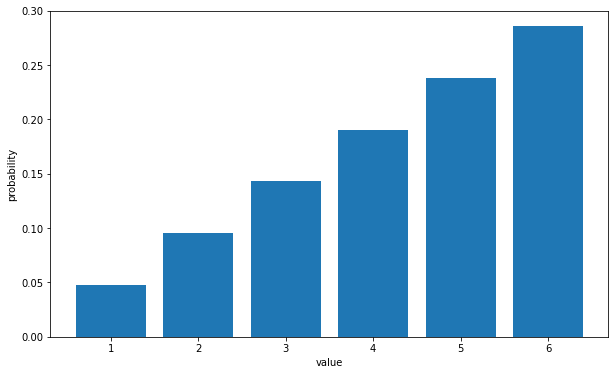

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)

ax.set_xlabel('value')
ax.set_ylabel('probability')
plt.show()

In [6]:
# 확률이 모두 0 이상인지 확인
np.all(prob >= 0)

True

In [7]:
np.sum(prob)

1.000

In [8]:
# 누적 분포 함수

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [9]:
F(3)

0.286

In [10]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])

dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

- 1-2. 1차원 이산형 확률변수의 지표

In [11]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [12]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.335

In [13]:
def E(X, g=lambda x:x):
    x_set, f=X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [14]:
E(X)

4.333

In [15]:
E(X, g=lambda x: 2*x + 3)

11.667

In [17]:
2 * E(X) + 3

11.667

In [19]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [20]:
def V(X, g = lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [21]:
V(X)

2.222

In [23]:
V(X, lambda x: 2*x +3)

8.889

In [24]:
2**2 * V(X)

8.889

2. 2차원 이산형 확률변수
- 2-1. 2차원 이산형 확률변수의 정의

In [28]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <=6:
        return y * (x-y) /441
    else:
        return 0

In [29]:
XY = [x_set, y_set, f_XY]

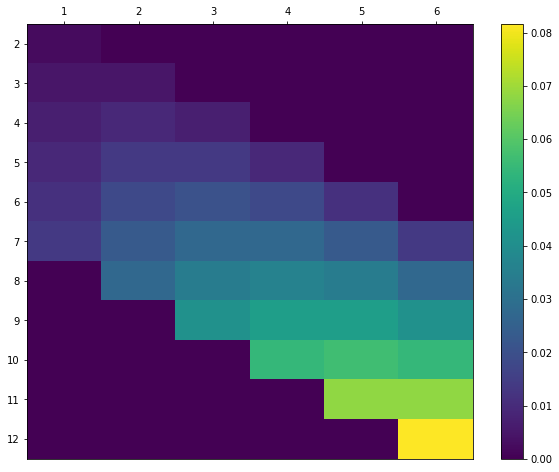

In [31]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

# y축을 내침차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()

# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()

fig.colorbar(c, ax=ax)
plt.show()

In [33]:
# 확률이 반드시 0 이상인지 확인
np.all(prob >= 0)

True

In [34]:
np.sum(prob)

1.000

In [35]:
# 주변 확률 분포 

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [36]:
X = [x_set, f_X]
Y = [y_set, f_Y]

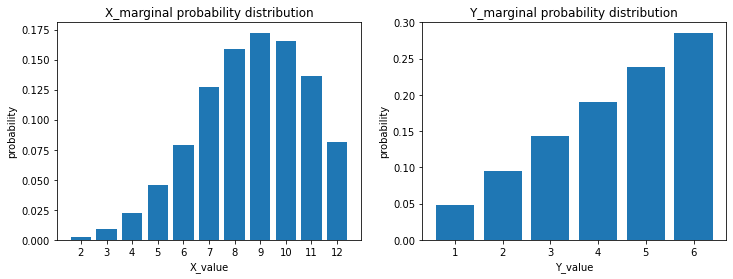

In [40]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

- 2-2. 2차원 이산형 확률변수의 지표

In [42]:
# 기댓값

np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [43]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [44]:
mean_X = E(XY, lambda x, y :x)
mean_X

8.667

In [45]:
mean_Y = E(XY, lambda x, y : y)
mean_Y

4.333

In [46]:
# 기댓값의 선형성
a, b = 2,3

E(XY, lambda x, y:a*x + b*y)

30.333

In [47]:
a * mean_X + b * mean_Y

30.333

In [50]:
# 분산
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [51]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [52]:
var_X = V(XY, g=lambda x, y:x)
var_X

4.444

In [53]:
var_Y = V(XY, g=lambda x, y:y)
var_Y

2.222

In [54]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    
    return np.sum([(x_i - mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [55]:
cov_xy = Cov(XY)
cov_xy

2.222

In [56]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [57]:
a**2 * var_X + b**2 *var_Y + 2*a*b *cov_xy

64.444

In [58]:
cov_xy / np.sqrt(var_X * var_Y)

0.707